<font size =8> Barnacle Detection by Training a Model
<font size =4>

In this experiment, I will tune a large pre-trained model. YOLO11 model is known for having exceptional object detection and counting abilities. By training it on a dataset of just Barnacles, I optimize its capabilities for the specific task of counting barnacles. I obtained the datatset of Barnacles from [Roboflow Universe](https://universe.roboflow.com/), world's largest collection of open source computer vision datasets and APIs.

In [7]:
from ultralytics import YOLO
from helpers import *
import os 
import matplotlib.pyplot as plt
from sahi import AutoDetectionModel
from sahi.predict import get_sliced_prediction

<font size =5>Training and initializing the model 

<font size =4> The YOLO model was trained using a Barnacle Detection dataset for 40 epochs on Google Collab. The best weight  were downloaded and stored in the best.pt file in this directory. The YOLO model uses this set of weights for the inference section. If interested on the specifics of the training, you can check out the YOLO11.ipynb notebook, or the Training_Results directory.


In [19]:
model = AutoDetectionModel.from_pretrained(
    model_type = "ultralytics", 
    model_path = 'best.pt', 
    confidence_threshold=0.3, 
    device ="cpu")
result = get_sliced_prediction(
    'images/sample_image2.png',
    model, slice_height=256,
    slice_width=256,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.4,
    )

object_prediction_list = result.object_prediction_list
result.to_fiftyone_detections()[:3]

print(len(object_prediction_list))
# object_count = len(result[0].boxes)
# print(f" The number of barnacles is: {object_count}")

Performing prediction on 88 slices.


ImportError: Please run "uv pip install -U fiftyone" to install fiftyone for conversion.

<font size = 4> While performing inference on the entire image containing 1000+ barnacles, the model grossly underperforms. This is because the dataset on which the model was trained comprises of images with relatively much lower number of barnacles. 

To tackle this issue, I take a similar approach as with the API-model, breaking the image down into ~30 images. The images are then stored in a temporary directory in the notebook and deleted upon the completion of the inference task. 

<font size = 5>Specifying Image Path and Output Directory

Directory 'C:\Users\arses\AppData\Local\Temp\tmp1yf6ocwv' created successfully.


<font size =5>Crop the image into ~30 smaller tiles

In [16]:
crop_image_into_tiles(image_path,output_directory)

Error: Image not found at sample_image2.png


<font size = 5>Running the loop for the counting the number of barnacles

In [17]:
number_of_barnacles= 0
number_of_images= directory_size(output_directory)
for i in range(number_of_images):
    
    result = model(f"{output_directory}/tile_{i}.png", verbose= False)
    count = len(result[0].boxes)
    number_of_barnacles+= count

print(f"The number of barnacles present in the image is: {number_of_barnacles}")


Number of files in 'C:/Users/arses/Desktop/Cropped_images': 36
The number of barnacles present in the image is: 493


<font size = 5>Removing the saved tiles from the directory 

In [ ]:
remove_files_from_directory(output_directory)

<Font size = 6> Comparing Performance

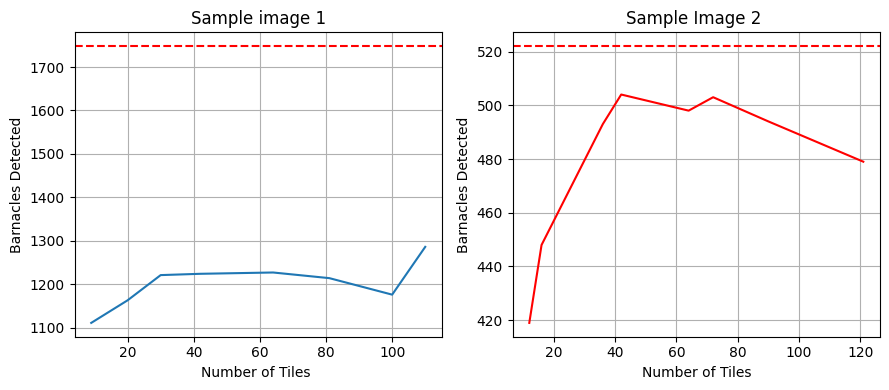

In [13]:
tiles_2 = [12, 16, 36, 42, 64, 72, 90, 121]
results_tiles_2 = [419, 448, 493, 504, 498, 503, 494, 479]

tiles = [9, 20 , 30, 42, 64, 81, 100, 110]
results_tiles = [1111, 1163, 1221, 1224, 1227, 1214, 1176, 1286]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (9,4))

ax1.plot(tiles, results_tiles)
ax1.set_title('Sample image 1')
ax1.set_xlabel('Number of Tiles ')
ax1.set_ylabel('Barnacles Detected')
ax1.grid()
ax1.axhline(y= 1748, color='r', linestyle='--', label='Actual number of Barnacles')


ax2.plot(tiles_2, results_tiles_2, color='red')
ax2.set_title('Sample Image 2 ')
ax2.set_xlabel('Number of Tiles')
ax2.set_ylabel('Barnacles Detected')
ax2.axhline(y= 522, color='r', linestyle='--', label='Actual number of Barnacles')
ax2.grid()

plt.tight_layout()
plt.show()


<font size =4> Here, the number of tiles refers to the number of cropped images the main image is broken down into for improved inference. While having more tiles might sound nice in thoery, making the work for model much easier, it can lead to repruscussion. For images with relatively less number of Barnacles, large number of pieces might mean that barnacles might get cropped across several images, rendering the model unable to recognize a lot of them. 

Rather a more heuristic method can be taken for image processing and the number of tiles the image is broken down into, based on the clustering and estimated number of barnacles in a picture.